# Why circular statistics matter - the case of respiratory signals

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize
import matplotlib.cm as cm

Respiration is inherently rhythmic, consisting of two distinct phases: inspiration and expiration. 

Respiration can be measured using different devices, but is often measured with a belt sensitive to pressure placed around the abdomen. As such the signal measured is higher when the abdomen is expanded, compared to contracted.  Interpreting such a through traditional linear methods can obscure important temporal and physiological distinctions.

Consider a simple sinusoidal signal used to represent the respiratory cycle as measured using a respiration belt. At two time points with identical amplitude values, one may occur during inspiration and the other during expiration. From a purely linear standpoint, these points are indistinguishable. However, from a biological perspective, they represent fundamentally different physiological states: differential brainstem activity, sensory gating, or cortical excitability, for example, are often phase-locked to either inspiration or expiration.


To demonstrate this, let's first generate a sinusoidal signal representing a few respiratory cycles!

In [17]:
# Settings
fs = 1000  # Sampling frequency in Hz
duration = 15  # seconds
t = np.linspace(0, duration, fs * duration, endpoint=False)
freq = 0.25  # respiration-like frequency in Hz (4s cycle)
resp_signal = np.sin(2 * np.pi * freq * t)

Then we plot

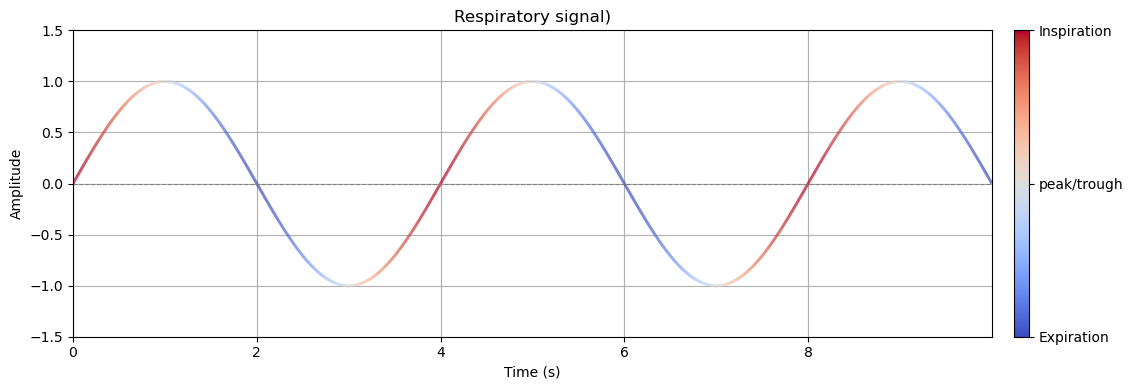

In [ ]:
# compute slope (derivative) for colormap
dresp = np.gradient(resp_signal)

# normalise for color mapping
slope_max = np.max(np.abs(dresp))
norm = Normalize(vmin=-slope_max, vmax=slope_max)
colors = cm.coolwarm(norm(dresp))

# prepare line segments
points = np.array([t, resp_signal]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, colors=colors[:-1], linewidths=2)

# Plot
fig, ax = plt.subplots(figsize=(12, 4))
ax.add_collection(lc)
ax.set_xlim(t.min(), t.max())
ax.set_ylim(-1.5, 1.5)
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax.set_title("Respiratory signal)")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
ax.grid(True)

# Colorbar with custom ticks and labels
sm = cm.ScalarMappable(norm=norm, cmap='coolwarm')
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)

# Custom tick positions and labels
tick_locs = [-slope_max, 0, slope_max]
tick_labels = ['Expiration', 'peak/trough', 'Inspiration']
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(tick_labels)


plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Settings
fs = 1000  # Sampling frequency in Hz
duration = 10  # seconds
t = np.linspace(0, duration, fs * duration, endpoint=False)
freq = 0.25  # respiration-like frequency in Hz (4s cycle)
resp_signal = np.sin(2 * np.pi * freq * t)
dresp = np.gradient(resp_signal)

# Normalize slope for color mapping
slope_max = np.max(np.abs(dresp))
norm = Normalize(vmin=-slope_max, vmax=slope_max)
colors = cm.coolwarm(norm(dresp))

# Build colored segments
points = np.array([t, resp_signal]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, colors=colors[:-1], linewidths=2)

# Plot setup
fig, ax = plt.subplots(figsize=(12, 4))
ax.add_collection(lc)
ax.set_xlim(t.min(), t.max())
ax.set_ylim(-1.5, 1.5)
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax.set_title("Respiratory signal", fontsize=14, pad=10)
ax.set_xlabel("Time (s)", fontsize=12)
ax.set_ylabel("Amplitude", fontsize=12)

# Minimal styling
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)
ax.tick_params(width=0.8)

# Helper to calculate slope angle using wider window
def compute_slope_angle(t_target, t, y, window_ms=100):
    window_samples = int((window_ms / 1000) * fs)
    idx = np.argmin(np.abs(t - t_target))
    idx1 = max(idx - window_samples, 0)
    idx2 = min(idx + window_samples, len(t) - 1)
    dx = t[idx2] - t[idx1]
    dy = y[idx2] - y[idx1]
    angle = np.degrees(np.arctan2(dy, dx))
    return angle, t[idx], y[idx]

# Expiration label at x = 2
angle_exp, x_exp, y_exp = compute_slope_angle(2, t, resp_signal)
ax.text(x_exp, y_exp, "Expiration", fontsize=11, rotation=angle_exp,
        color='blue', va='top', ha='center', fontweight='medium')

# Inspiration label at x = 4
angle_insp, x_insp, y_insp = compute_slope_angle(4, t, resp_signal)
ax.text(x_insp, y_insp, "Inspiration", fontsize=11, rotation=angle_insp,
        color='red', va='bottom', ha='center', fontweight='medium')

plt.tight_layout()
plt.show()


## Caveats of the hilbert transform used in this notebook
* link to other notebook